In [1]:
from header import *
from util import *
import types
from lmfit.models import SkewedGaussianModel

In [2]:
def get_halo_center(ds, center_guess, radius=50):
    print('Trying to find center within', np.round(radius, decimals=3), 'physical kpc around', center_guess, '...')
    sphere = ds.sphere(center_guess, (radius, 'kpc'))

    x_pos = np.array(sphere['x'].in_units('code_length'))
    y_pos = np.array(sphere['y'].in_units('code_length'))
    z_pos = np.array(sphere['z'].in_units('code_length'))

    dm_density = sphere['Dark_Matter_Density']
    imax1 = (np.where(dm_density > 0.9999 * np.max(dm_density)))[0][0]
    imax2 = (np.where(dm_density == np.max(dm_density)))[0][0]
    print('imax1 =', imax1, 'imax2 =', imax2, 'out of', len(dm_density), 'max density =', np.max(dm_density)) #
    imax = imax1 # imax2
    halo_center = [x_pos[imax], y_pos[imax], z_pos[imax]]
    return halo_center

In [3]:
foggie_dir = '/Volumes/Elements/foggieforayan/' # '/Users/acharyya/models/simulation_output/foggie/' #
halo = '8508'
run = 'nref11c_nref9f'
output = 'DD1478'
ds = yt.load(foggie_dir + 'halo_00' + halo + '/' + run + '/' + output + '/' + output)

yt : [INFO     ] 2022-08-15 18:53:38,692 Parameters: current_time              = 402.31652781829
yt : [INFO     ] 2022-08-15 18:53:38,693 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2022-08-15 18:53:38,694 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-08-15 18:53:38,695 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2022-08-15 18:53:38,696 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2022-08-15 18:53:38,696 Parameters: current_redshift          = 0.50007848881181
yt : [INFO     ] 2022-08-15 18:53:38,697 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2022-08-15 18:53:38,697 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2022-08-15 18:53:38,698 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2022-08-15 18:53:38,698 Parameters: hubble_constant           = 0.695


In [4]:
galrad = 10 # kpc
galrad = galrad / (1 + ds.current_redshift) / 0.695 # to convert to comoving galrad ckpch^-1 as sopposed to physical galrad kpc
box_width = 2 * galrad # kpc
res = 1 # kpc
nbins = 100
xmax = 4
field = ('gas', 'metallicity')
print(galrad)

9.591824238497017


In [5]:
args = types.SimpleNamespace()
args.code_path = '/Users/acharyya/Work/astro/ayan_codes/foggie/foggie/'
args.halo = halo
args.run = run
args.output = output
args.system = 'ayan_hd'
args.silent, args.print_to_file, args.pwd = False, False, False
args = pull_halo_center(args)
print(args.halo_center)

[0] {MacBook-Pro.local} Pulling halo center from catalog file

[47130.085404201745 45844.49906760967 48598.80421879704]


In [6]:
box_center = ds.arr(args.halo_center, kpc)
box_width_kpc = ds.arr(box_width, 'kpc')
box = ds.r[box_center[0] - box_width_kpc / 2.: box_center[0] + box_width_kpc / 2., box_center[1] - box_width_kpc / 2.: box_center[1] + box_width_kpc / 2., box_center[2] - box_width_kpc / 2.: box_center[2] + box_width_kpc / 2., ]
print(box_center, box_width)

Parsing Hierarchy : 100%|██████████| 5947/5947 [00:00<00:00, 8493.39it/s] 
yt : [INFO     ] 2022-08-15 18:53:39,661 Gathering a field list (this may take a moment.)


[47130.085404201745 45844.49906760967 48598.80421879704] kpc 19.183648476994033


In [7]:
Znative = box[field].in_units('Zsun').ndarray_view()
dnative = box[('gas', 'density')].in_units('Msun/pc**3').ndarray_view()
mnative = box[('gas', 'mass')].in_units('Msun').ndarray_view()

yt : [INFO     ] 2022-08-15 18:53:55,352 Projection completed
yt : [INFO     ] 2022-08-15 18:53:55,353 xlim = -874186.423155 965875.421290
yt : [INFO     ] 2022-08-15 18:53:55,354 ylim = -871432.118003 968629.726441
yt : [INFO     ] 2022-08-15 18:53:55,355 xlim = -9.113870 10.069778
yt : [INFO     ] 2022-08-15 18:53:55,355 ylim = -9.085155 10.098493
yt : [INFO     ] 2022-08-15 18:53:55,357 Making a fixed resolution buffer of (('gas', 'metallicity')) 800 by 800
yt : [WARNING  ] 2022-08-15 18:53:55,376 Plotting ('gas', 'metallicity'): All values = 0.0 Zsun
yt : [WARNING  ] 2022-08-15 18:53:55,377 Switching to linear colorbar scaling.



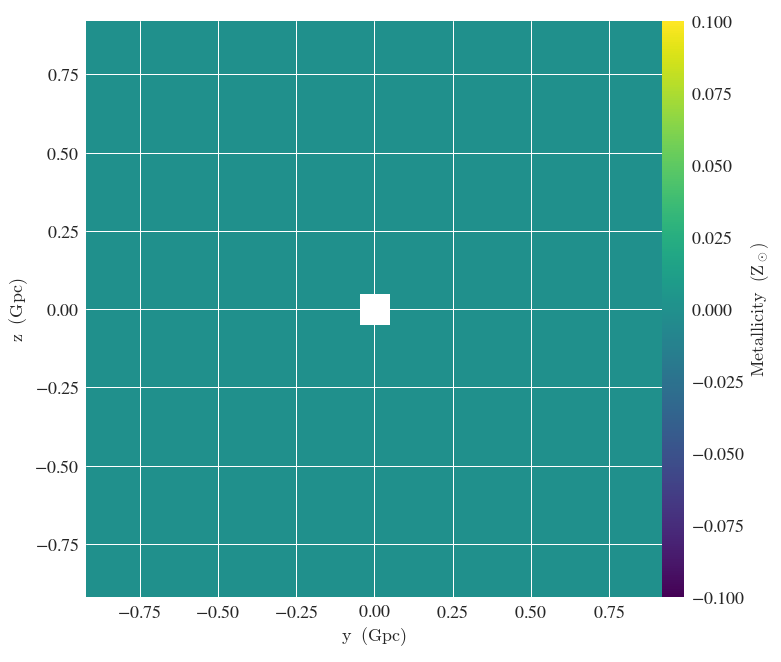

In [8]:
p = yt.ProjectionPlot(ds, 'x', field, center=box_center, data_source=box, width=box_width, weight_field=('gas', 'density'))
#p.set_log(field, True)
p.set_cmap(field, metal_color_map)
p.set_unit(field, 'Zsun')
#p.set_zlim(field, zmin=2e-2, zmax=5e0)
p.show()

yt : [INFO     ] 2022-08-15 18:53:59,637 Projection completed
yt : [INFO     ] 2022-08-15 18:53:59,638 xlim = 0.477854 0.478054
yt : [INFO     ] 2022-08-15 18:53:59,639 ylim = 0.506569 0.506769
yt : [INFO     ] 2022-08-15 18:53:59,640 xlim = 0.477854 0.478054
yt : [INFO     ] 2022-08-15 18:53:59,641 ylim = 0.506569 0.506769
yt : [INFO     ] 2022-08-15 18:53:59,642 Making a fixed resolution buffer of (('gas', 'metallicity')) 800 by 800



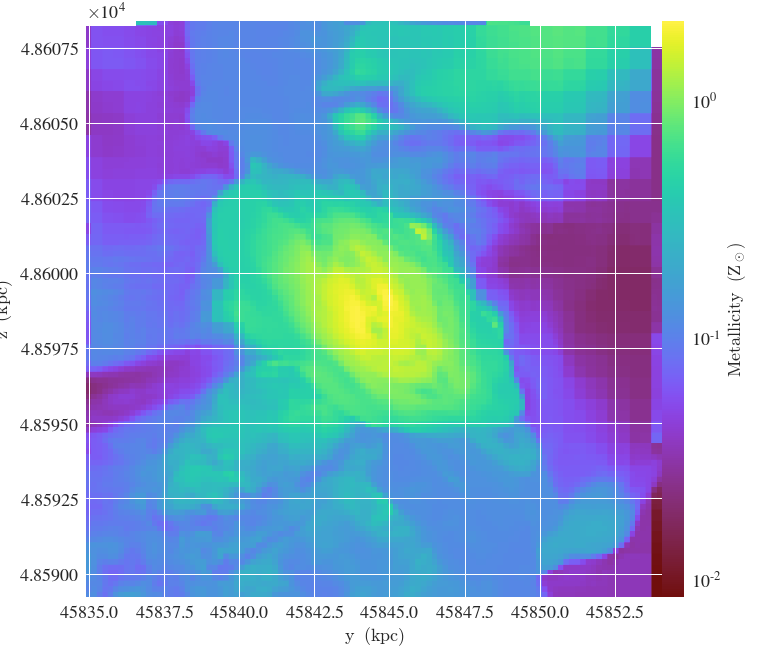

In [9]:
prjx = ds.proj(field, 'x', center=box_center, data_source=box, weight_field=('gas', 'density'))
p = prjx.plot()
#p.set_log(field, True)
#p.set_cmap(field, metal_color_map)
#p.set_unit(field, 'Zsun')
#p.set_zlim(field, zmin=2e-2, zmax=5e0)

yt : [INFO     ] 2022-08-15 18:54:00,046 Making a fixed resolution buffer of (('gas', 'metallicity')) 19 by 19
yt : [INFO     ] 2022-08-15 18:54:00,048 Making a fixed resolution buffer of (('gas', 'density')) 19 by 19
yt : [INFO     ] 2022-08-15 18:54:00,224 Projection completed
yt : [INFO     ] 2022-08-15 18:54:00,238 Making a fixed resolution buffer of (('gas', 'mass')) 19 by 19
yt : [INFO     ] 2022-08-15 18:54:00,659 Projection completed


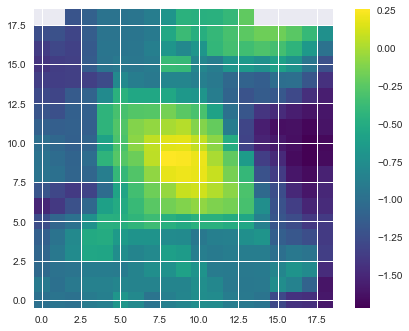

In [10]:
frbx = prjx.to_frb((box_width, 'kpc'), box_width/res, center=box_center)
Zfrbx = np.array(frbx['gas', 'metallicity'])
dfrbx = np.array(frbx['gas', 'density'])
mfrbx = np.array(frbx['gas', 'mass'])
plt.imshow(np.log10(Zfrbx), cmap='viridis')#, vmin=2e-2, vmax=5e0)
plt.colorbar()

yt : [INFO     ] 2022-08-15 18:54:01,122 xlim = 0.506569 0.506769
yt : [INFO     ] 2022-08-15 18:54:01,122 ylim = 0.491257 0.491457
yt : [INFO     ] 2022-08-15 18:54:01,124 xlim = 0.506569 0.506769
yt : [INFO     ] 2022-08-15 18:54:01,124 ylim = 0.491257 0.491457
yt : [INFO     ] 2022-08-15 18:54:01,125 Making a fixed resolution buffer of (('gas', 'metallicity')) 800 by 800



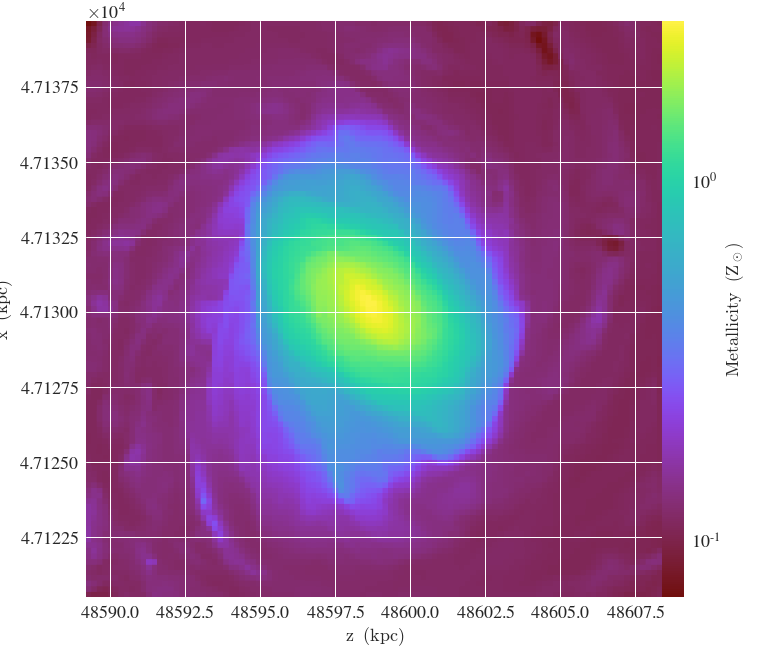

In [11]:
prjy = ds.proj(('gas', 'metallicity'), 'y', center=box_center, data_source=box, weight_field=('gas', 'density'))
p = prjy.plot()

yt : [INFO     ] 2022-08-15 18:54:01,667 Making a fixed resolution buffer of (('gas', 'metallicity')) 19 by 19
yt : [INFO     ] 2022-08-15 18:54:01,670 Making a fixed resolution buffer of (('gas', 'density')) 19 by 19
yt : [INFO     ] 2022-08-15 18:54:01,843 Projection completed
yt : [INFO     ] 2022-08-15 18:54:01,855 Making a fixed resolution buffer of (('gas', 'mass')) 19 by 19
yt : [INFO     ] 2022-08-15 18:54:02,273 Projection completed


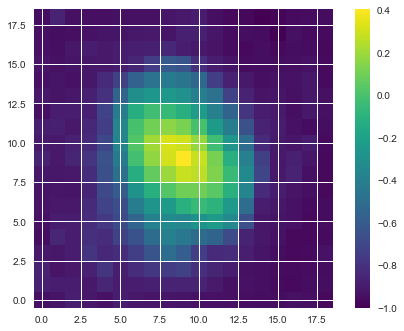

In [12]:
frby = prjy.to_frb((box_width, 'kpc'), box_width/res, center=box_center)
Zfrby = np.array(frby['gas', 'metallicity'])
dfrby = np.array(frby['gas', 'density'])
mfrby = np.array(frby['gas', 'mass'])
plt.imshow(np.log10(Zfrby), cmap='viridis')
plt.colorbar()

yt : [INFO     ] 2022-08-15 18:54:02,747 xlim = 0.491257 0.491457
yt : [INFO     ] 2022-08-15 18:54:02,747 ylim = 0.477854 0.478054
yt : [INFO     ] 2022-08-15 18:54:02,748 xlim = 0.491257 0.491457
yt : [INFO     ] 2022-08-15 18:54:02,749 ylim = 0.477854 0.478054
yt : [INFO     ] 2022-08-15 18:54:02,750 Making a fixed resolution buffer of (('gas', 'metallicity')) 800 by 800



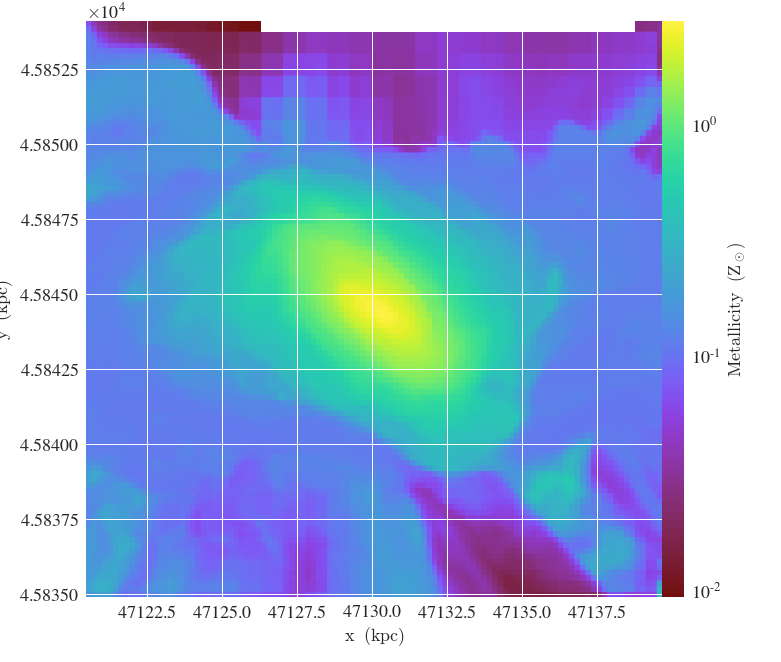

In [13]:
prjz = ds.proj(('gas', 'metallicity'), 'z', center=box_center, data_source=box, weight_field=('gas', 'density'))
p = prjz.plot()

yt : [INFO     ] 2022-08-15 18:54:03,216 Making a fixed resolution buffer of (('gas', 'metallicity')) 19 by 19
yt : [INFO     ] 2022-08-15 18:54:03,219 Making a fixed resolution buffer of (('gas', 'density')) 19 by 19
yt : [INFO     ] 2022-08-15 18:54:03,403 Projection completed
yt : [INFO     ] 2022-08-15 18:54:03,417 Making a fixed resolution buffer of (('gas', 'mass')) 19 by 19
yt : [INFO     ] 2022-08-15 18:54:03,866 Projection completed


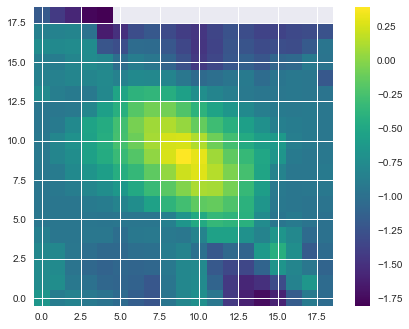

In [14]:
frbz = prjz.to_frb((box_width, 'kpc'), box_width/res, center=box_center)
Zfrbz = np.array(frbz['gas', 'metallicity'])
dfrbz = np.array(frbz['gas', 'density'])
mfrbz = np.array(frbz['gas', 'mass'])
plt.imshow(np.log10(Zfrbz), cmap='viridis')
plt.colorbar()

(0.0, 2.0)

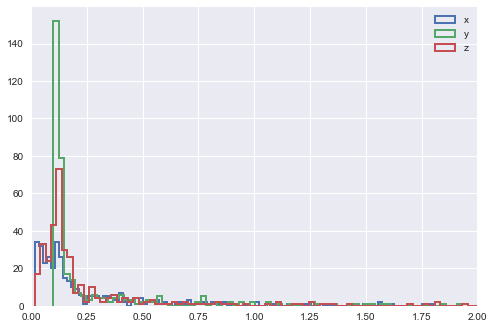

In [15]:
plt.figure()
plt.hist(Zfrbx.flatten(), histtype='step', bins=nbins, lw=2, label='x')#, weights=mfrbx.flatten())
plt.hist(Zfrby.flatten(), histtype='step', bins=nbins, lw=2, label='y')#, weights=mfrby.flatten())
plt.hist(Zfrbz.flatten(), histtype='step', bins=nbins, lw=2, label='z')#, weights=mfrbz.flatten())
plt.legend()
plt.xlim(0, 2)

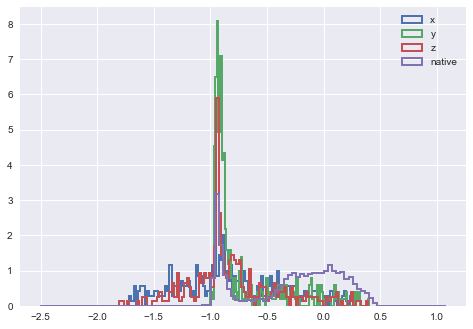

In [16]:
plt.hist(np.log10(Zfrbx.flatten()), bins=nbins, histtype='step', lw=2, label='x', density=True)#, weights=mfrbx.flatten())
plt.hist(np.log10(Zfrby.flatten()), bins=nbins, histtype='step', lw=2, label='y', density=True)#, weights=mfrby.flatten())
plt.hist(np.log10(Zfrbz.flatten()), bins=nbins, histtype='step', lw=2, label='z', density=True)#, weights=mfrbz.flatten())
plt.hist(np.log10(Znative), bins=nbins, histtype='step', lw=2, label='native', density=True, weights=mnative.flatten())
plt.legend()
#plt.xlim(-1, 1)

Up to this ^ was 2D FRBs..the following is for 3D FRBs

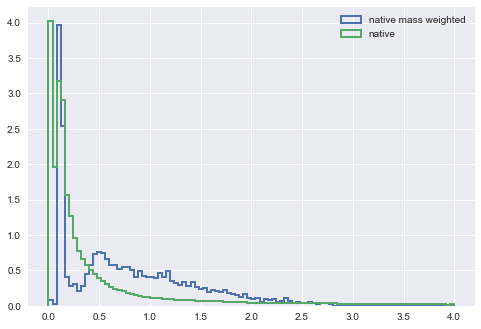

In [17]:
plt.figure()
plt.hist(Znative, bins=nbins, range=(0, xmax), histtype='step', lw=2, density=True, weights=mnative, label='native mass weighted')
plt.hist(Znative, bins=nbins, range=(0, xmax), histtype='step', lw=2, density=True, label='native')
plt.legend()

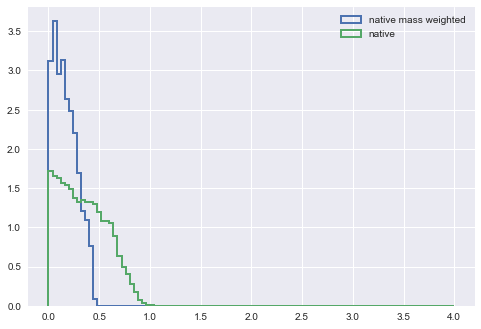

In [18]:
plt.figure()
plt.hist(np.log10(Znative), bins=nbins, range=(0, xmax), histtype='step', lw=2, density=True, weights=mnative, label='native mass weighted')
plt.hist(np.log10(Znative), bins=nbins, range=(0, xmax), histtype='step', lw=2, density=True, label='native')
plt.legend()
#plt.xlim(-1.5, 0.2)

In [19]:
ax = 1 # 0 Or 1 Or 2
ncells = int(box_width/res)
print(ncells)
#box = ds.r[box_center[0] - box_width_kpc / 2.: box_center[0] + box_width_kpc / 2.:str(ncells)+'j', box_center[1] - box_width_kpc / 2.: box_center[1] + box_width_kpc / 2.:str(ncells)+'j', box_center[2] - box_width_kpc / 2.: box_center[2] + box_width_kpc / 2.:str(ncells)+'j']
box = ds.arbitrary_grid(left_edge=[box_center[0] - box_width_kpc / 2., box_center[1] - box_width_kpc / 2., box_center[2] - box_width_kpc / 2.], \
                        right_edge=[box_center[0] + box_width_kpc / 2., box_center[1] + box_width_kpc / 2., box_center[2] + box_width_kpc / 2.], \
                        dims=[ncells, ncells, ncells])


19


In [20]:
ds.all_data()[('gas', 'mass')].sum(), box_width_kpc, np.shape(box), box[('gas', 'mass')].sum()

(unyt_quantity(3.66075706e+49, 'g'),
 unyt_array(19.18364848, 'kpc'),
 (19, 19, 19),
 unyt_quantity(1.5003383e+43, 'g'))

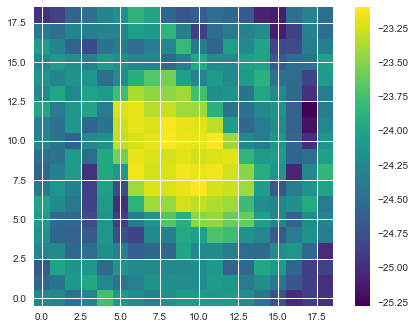

In [21]:
den_res = box['gas', 'density']
plt.imshow(np.log10(den_res.sum(axis=ax)), cmap='viridis')
plt.colorbar()

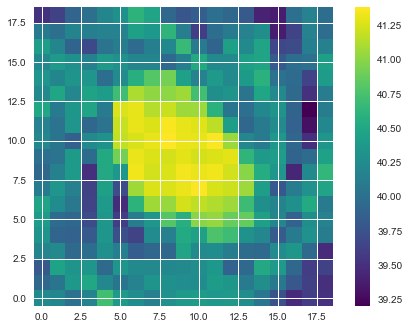

In [22]:
mass_res = box['mass']
plt.imshow(np.log10(mass_res.sum(axis=ax)), cmap='viridis')
plt.colorbar()

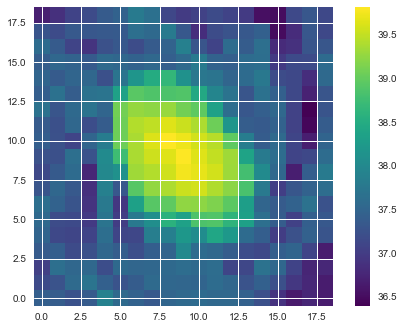

In [23]:
metal_res = box['metal_mass']
plt.imshow(np.log10(metal_res.sum(axis=ax)), cmap='viridis')
plt.colorbar()

(19, (19, 19, 19), unyt_quantity(0.13841701, 'Zsun'))

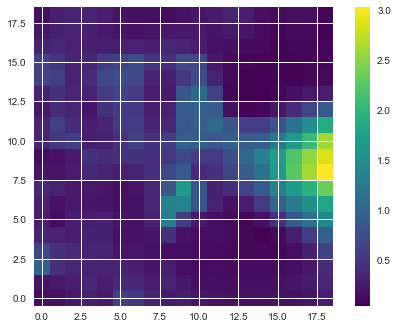

In [24]:
Zres_direct = box['metallicity']
plt.imshow(Zres_direct.mean(axis=ax), cmap='viridis')
plt.colorbar()
len(Zres_direct), np.shape(Zres_direct),np.median(Zres_direct)

(19, (19, 19), unyt_quantity(0.1269698, '(dimensionless)'))

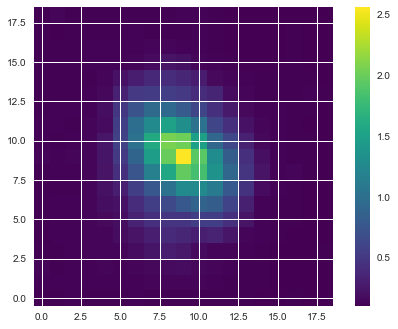

In [25]:
from yt.utilities.physical_ratios import metallicity_sun
Zres_div = metal_res.sum(axis=ax) / mass_res.sum(axis=ax) / metallicity_sun
plt.imshow(Zres_div, cmap='viridis')
plt.colorbar()
len(Zres_div), np.shape(Zres_div),  np.median(Zres_div)

(0.0, 4.0)

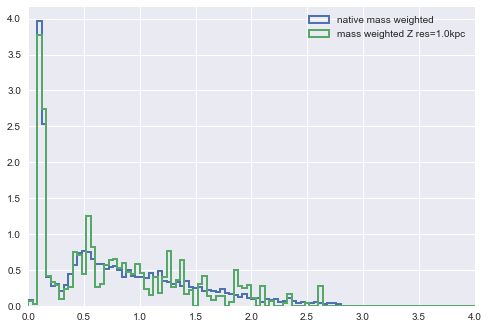

In [26]:
plt.hist(Znative, bins=nbins, range=(0, xmax), histtype='step', lw=2, density=True, weights=mnative, label='native mass weighted')
plt.hist(Zres_direct.flatten(), bins=nbins, range=(0, xmax), histtype='step', lw=2, density=True, weights=mass_res.flatten(), label='mass weighted Z res=%.1Fkpc'%(res))
plt.legend()
plt.xlim(0, xmax)

[[Model]]
    Model(skewed_gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 248
    # data points      = 100
    # variables        = 4
    chi-square         = 16.6014209
    reduced chi-square = 0.17293147
    Akaike info crit   = -171.568190
    Bayesian info crit = -161.147509
##  Warning: uncertainties could not be estimated:
[[Variables]]
    amplitude:  83.6617255 (init = 1)
    center:    -6.66712539 (init = 1)
    sigma:      2.66283311 (init = 1)
    gamma:      5.35679858 (init = 0)


Text(0.95, 0.75, 'DD1478')

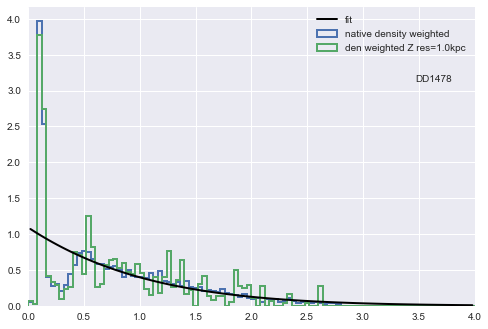

In [27]:
model = SkewedGaussianModel()
params = model.make_params(amplitude=1, center=1, sigma=1, gamma=0)

y, x = np.histogram(Zres_direct.flatten(), bins=nbins, density=True, weights=mass_res.flatten(), range=(0, xmax))
x = x[:-1] + np.diff(x)/2
result = model.fit(y, params, x=x)
print(result.fit_report())

plt.hist(Znative, bins=nbins, range=(0, xmax), histtype='step', lw=2, density=True, weights=dnative, label='native density weighted')
plt.hist(Zres_direct.flatten(), bins=nbins, range=(0, xmax), histtype='step', lw=2, density=True, weights=mass_res.flatten(), label='den weighted Z res=%.1Fkpc'%(res))
plt.plot(x, result.best_fit, c='k', lw=2, label='fit')
plt.legend()
plt.xlim(0, xmax)
ax=plt.gca()
plt.text(0.95, 0.75, args.output, ha='right', transform=ax.transAxes)